<a href="https://colab.research.google.com/github/EsliVivar/Lab12/blob/master/Ciclos_combinados_en_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyromat
import pyromat as pm
pm.config["unit_pressure"] = "kPa"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.2 MB/s eta 0:00:00


In [ ]:
def pr_vr_T(T):
  import numpy as np
  import pyromat as pm
  a = pm.get("ig.air")
  #las siguientes propiedades son de la tabla A-17 a 200K
  Pr_libro = 0.3363
  So_libro = 1.29559
  vr_libro = 1707
  factor = a.s(T=200)-So_libro
  R = 0.2870
  A1 = (So_libro)/(R)-np.log(Pr_libro)
  A2 = vr_libro*Pr_libro/200
  pr = np.exp((a.s(T=T, p=101.325)-factor)/(pm.units.const_Ru/a.mw())-A1)
  vr = T/pr*A2
  return float(pr[0]),float(vr[0])

def T_pr(pr):
  import numpy as np
  import pyromat as pm
  a = pm.get("ig.air")
  #las siguientes propiedades son de la tabla A-17 a 200K
  Pr_libro = 0.3363
  So_libro = 1.29559
  factor = a.s(T=200, p=101.325)-So_libro
  R = 0.2870
  A1 = (So_libro)/(R)-np.log(Pr_libro)
  return a.T_s((np.log(pr)+A1)*(pm.units.const_Ru/a.mw())+factor, p=101.325)

#10-88

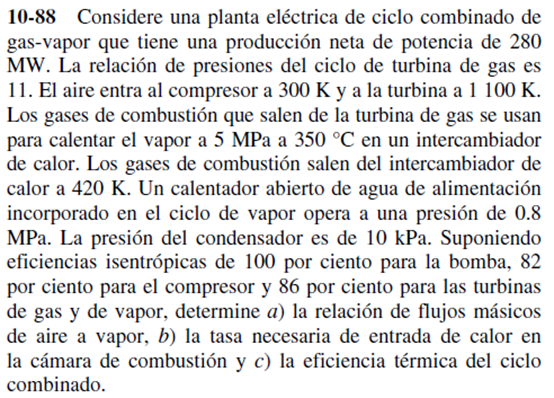

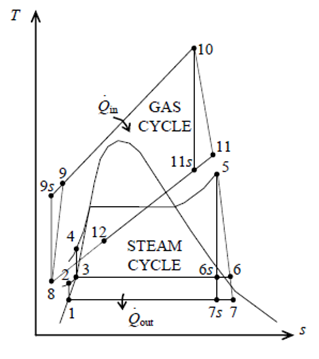

**Sustancias**

In [ ]:
aire = pm.get("ig.air")
agua = pm.get("mp.H2O")

**Estado 8**

$r_p = \frac {P_9}{P_8} = \frac {P_{10}}{P_{11}} = 11$

In [ ]:
rp = 11

In [ ]:
T8 = 300 #K
Pr8, vr8 = pr_vr_T(T=T8)
h8 = aire.h(T=T8)

**Estado 9s**

$\frac {P_{r9}}{P_{r8}} = \frac {P_9}{P_8}$

In [ ]:
Pr9 = rp*Pr8
T9s = T_pr(pr=Pr9)
print(T9)
h9s = aire.h(T=T9s)

[589.07057838]


**Estado 9**

$\eta_C = 0.82 = \frac {h_{9s}-h_8}{h_9-h_8}$

In [ ]:
eta_C = 0.82
h9= (h9s - h8)/eta_C+h8
print(h9)

[358.04251299]


**Estado 10**

In [ ]:
T10 = 1100 #K
h10 = aire.h(T=T10)
Pr10, vr10 = pr_vr_T(T=T10)

**Estado 11s**

$\frac {P_{r11}}{P_{r10}} = \frac {P_{11}}{P_{10}} = \frac {1}{r_P}$



In [ ]:
Pr11 = Pr10/rp
T11 = T_pr(pr=Pr11)
h11s = aire.h(T=T11)

15.200539003602707


**Estado 11**

$\eta_T = 0.86 = \frac {h_{10} - h_{11} }{h_{10} - h_{11s}}$

In [ ]:
h11 = h10-(h10 - h11s)*0.86
print(h11)

[371.87414448]


**Estado 12**

In [ ]:
T12 = 420 #K
h12 = aire.h(T=T12)

**Estado 1**

In [ ]:
x1 = 0
P1 = 10 #kPa
s1 = agua.s(x=x1, p=P1)
h1 = agua.h(x=x1, p=P1)

**Estado 2**

In [ ]:
s2 = s1
P2 = 800 #kPa
h2 = agua.h(s=s2, p=P2)

**Estado 3**

In [ ]:
P3 = P2
x3 = 0
s3 = agua.s(p=P3, x=x3)
h3 = agua.h(p=P3, x=x3)

**Estado 4**

In [ ]:
s4 = s3
P4 = 5000 #kPa
h4 = agua.h(s=s4, p=P4)

**Estado 5**

In [ ]:
P5 = P4
T5 = 350 + 273.15
s5 = agua.s(p=P5, T=T5)
h5 = agua.h(p=P5, T=T5)

**Estado 6s**

In [ ]:
P6 = P2
s6s = s5
h6s = agua.h(p=P6, s=s6s)

**Estado 6**

$\eta_T = 0.86 = \frac {h_{5} - h_{6} }{h_{5} - h_{6s}}$

In [ ]:
h6 = h5-(h5 - h6s)*0.86

**Estado 7s**

In [ ]:
s7s = s5
P7 = P1
h7s = agua.h(p=P7, s=s7s)

**Estado 7**

$\eta_T = 0.86 = \frac {h_{5} - h_{7} }{h_{5} - h_{7s}}$

In [ ]:
h7 = h5-(h5 - h7s)*0.86

**Relación de flujos másicos de aire a vapor**

Balance de energía en el intercambiador de calor

$\dot m_gh_{11} + \dot m_vh_4 - \dot m_gh_{12} - \dot m_vh_5= 0$

DUPA

$r_{gv}=\frac {\dot m_g}{\dot m_v} = \frac {h_5-h_4}{h_{11}-h_{12}}$

In [ ]:
rgv = (h5 - h4)/(h11 - h12)
print("la relación de flujos másicos es de: ", rgv, "kg de gas/kg de vapor")

la relación de flujos másicos es de:  [9.26116017] kg de gas/kg de vapor


**Tasa de entrada de calor**

$Q_i = \dot m_g(h_{10} - h_9)$

No contamos con el flujo másico de gas, por lo que es necesario encontrar la potencia neta en ambos ciclos

Potencia neta del ciclo Rankine

$W_{nR} = \dot m_v (h_5 - h_6) + (1-y)\dot m_v (h_6 - h_7) - \dot m_v (1-y)(h_2 - h_1)-\dot m_v (h_4 - h_3)$

Debemos dejarlo en términos del flujo másico de gas

$W_{nR} = \dot m_g/r_{gv} ( (h_5 - h_6) + (1-y) (h_6 - h_7) - (1-y)(h_2 - h_1)-(h_4 - h_3))$

Pero no contamos con el valor de y

Balance de energía en el calentador abierto de alimentación

$yh_6 + (1-y)h_2 - h_3 = 0$

DUPA

$y = \frac {h_3-h_2}{h_6-h_2}$



In [ ]:
y = (h3-h2)/(h6 - h2)
print(y)

[0.20816445]


Potencia neta ciclo Brayton

$W_{nB} = \dot m_g ((h_10 -h_11) - (h_9 - h_8))$

Potencia neta de todo el ciclo

$W_n = W_{nB} + W_{nR}$

$250,000 kW = \dot m_g ((h_{10} -h_11) - (h_9 - h_8)) + \dot m_g/r_{gv} ( (h_5 - h_6) + (1-y) (h_6 - h_7) - (1-y)(h_2 - h_1)-(h_4 - h_3))$

$W_n = \dot m_g w_{nb} + \dot m_g/r_{gv} w_{nR}$

In [ ]:
Wn = 280000
wnB = ((h10 - h11) - (h9-h8))
wnR = ((h5 - h6 )+(1-y)*(h6 - h7)-(1-y)*(h2 -h1 )-(h4-h3))
print(wnB)
print(wnR)

[126.23673633]
[764.49081031]


In [ ]:
w_net = (wnB + 1/rgv*wnR)
print(w_net)

m_g = Wn/w_net
print(m_g)

[208.78479684]
[1341.0938164]


In [ ]:
Qi = m_g*(h10 - h9)
print(Qi)

[671241.61533122]


**Eficiencia térmica**

In [ ]:
eta = Wn/Qi
print(eta)

[0.41713743]
